In [10]:
#Sentiment Analysis using Natural Language Processing(NLP)-Dataset of Amazon alexa review

In [11]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Loading the dataset(Amazon Alexa Reviews)
data = pd.read_csv(r"C:\Users\mdosa\Downloads\alexa\amazon_alexa.tsv",sep="\t")

In [13]:
#Data Exploration
#Displaying the dataset
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [14]:
#Displaying the first 5 rows(Default)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [15]:
#Column names of the Dataframe
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [16]:
#Check for Null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [17]:
#Getting the record where "verified reviews" is null
data[data["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [18]:
#Dropping the null record
data.dropna(inplace=True)

In [19]:
#Dataset shape after dropping null values
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [20]:
#Percentage distribution of each rating
print(f"Rating value_count - Percentage distribution: \n{round(data["rating"].value_counts()/data.shape[0]*100,2)}")

Rating value_count - Percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


In [21]:
#Creating a new column called "length" that will contain the length of the string in "verified reviews" column
data["length"] = data["verified_reviews"].apply(len)

In [22]:
#Displaying the rows after adding new column "length"
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [23]:
#Randomly checking for 12th record
print(f"'verified_reviews' column values: {data.iloc[12]["verified_reviews"]}")
print(f"length of review : {len(data.iloc[12]["verified_reviews"])}")
print(f"'length' column values : {data.iloc[12]["length"]}")

'verified_reviews' column values: I purchased this for my mother who is having knee problems now, to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do...Alexa play this song, What time is it and where, and how to cook this and that!
length of review : 290
'length' column values : 290


In [24]:
#Datatypes of the features
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [25]:
#Analyzing the "rating" column
len(data)

3149

In [26]:
#Distinct values of "rating" and its count
print(f"Rating value count: \n{data["rating"].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


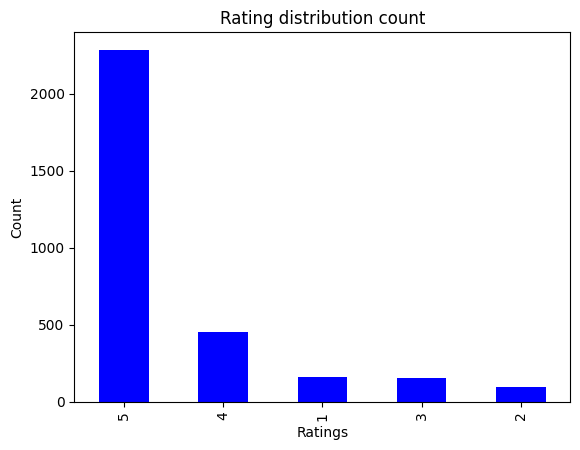

In [27]:
#Bar graph of above values("Rating value count")
data["rating"].value_counts().plot.bar(color = "blue")
plt.title("Rating distribution count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

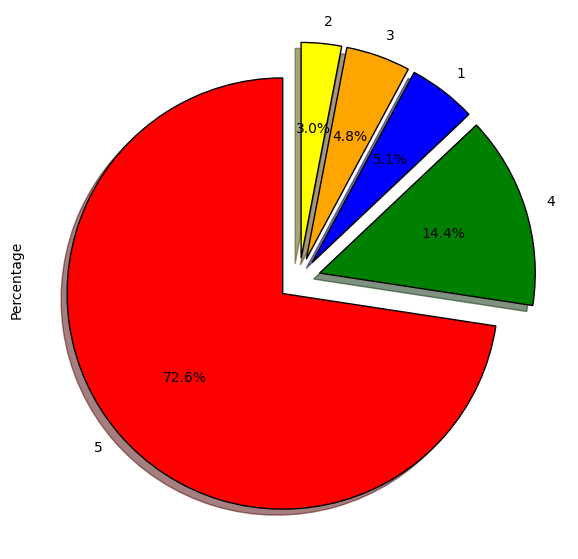

In [28]:
#Plotting pie chart of above values("Rating value count)
fig = plt.figure(figsize=(7,7))
colors = ("red","green","blue","orange","yellow")
wp = {"linewidth":1,"edgecolor":"black"}
tags = data["rating"].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label="Percentage")
from io import BytesIO
graph = BytesIO()
fig.savefig(graph,format="png")

In [29]:
#Analysing feedback column
#If feedback present then '1' or else '0'
print(f"Feedback value count: \n{data["feedback"].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [30]:
#Extracting the "verified_reviews" value for one record with feedback = 0
#feedback '0' is negative
review_0 = data[data["feedback"] == 0].iloc[1]["verified_reviews"]
print(review_0)

Sound is terrible if u want good music too get a bose


In [31]:
#Extracting the "verified_reviews" value for one record with feedback = 1
#feedback '1'is positive
review_1 = data[data["feedback"] == 1].iloc[1]["verified_reviews"]
print(review_1)

Loved it!


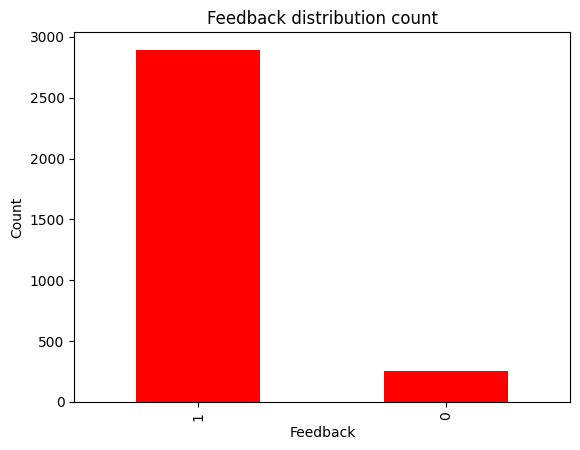

In [32]:
#Bar graph to visualize total count of each feedback
data["feedback"].value_counts().plot.bar(color = "red")
plt.title("Feedback distribution count")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()

In [33]:
#Finding the percentage distribution of each feedback.
print(f"feedback value count - percentage distribution: \n{round(data["feedback"].value_counts()/data.shape[0]*100,2)}")

feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='percentage'>

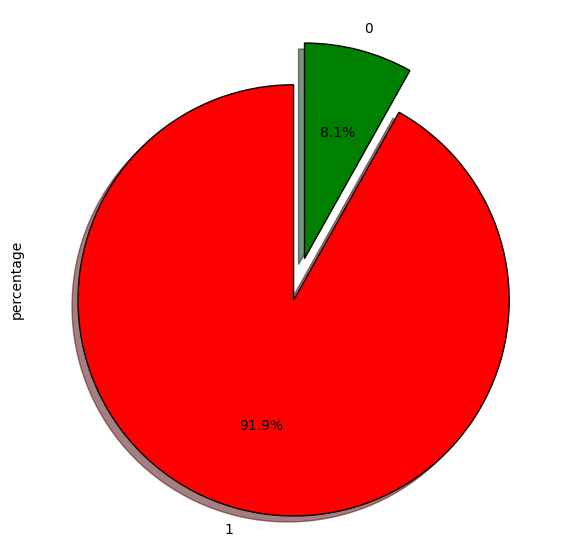

In [34]:
fig = plt.figure(figsize=(7,7))
colors = ("red","green")
wp = {"linewidth":1,"edgecolor":"black"}
tags = data["feedback"].value_counts()/data.shape[0]
explode = (0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label="percentage")

In [35]:
#Feedback = 0
data[data["feedback"] == 0]["rating"].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [36]:
#Feedback = 1
data[data["feedback"]==1]["rating"].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [37]:
#Analyzing variation column(Types pf Amazon products)
print(f"Variation value count: \\n{data["variation"].value_counts()}")

Variation value count: \nvariation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [38]:
#Mean rating
data.groupby("variation")["rating"].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

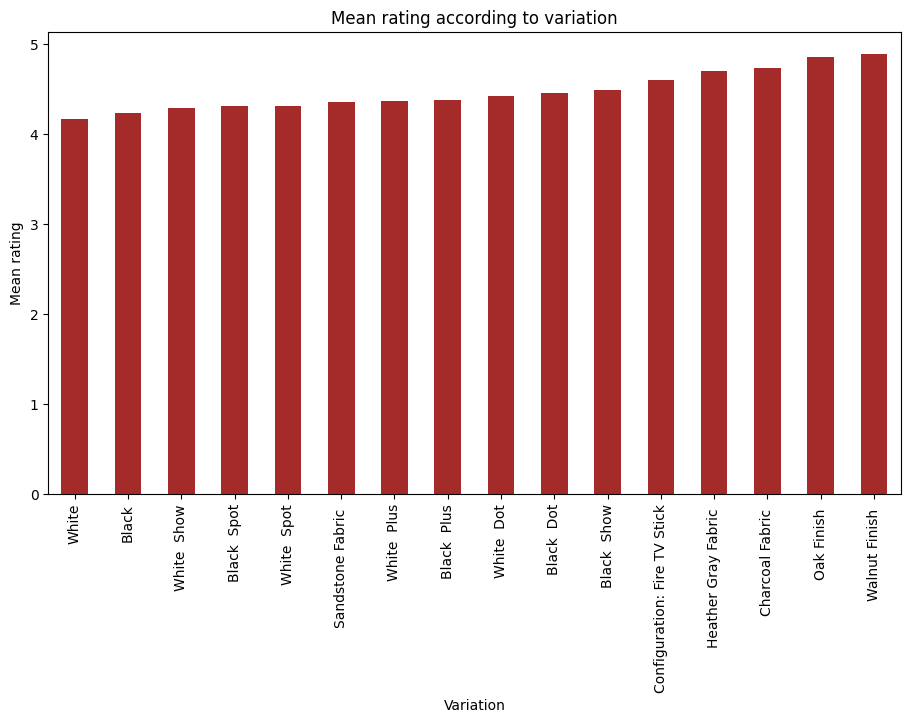

In [39]:
#Analyzing the above ratings
data.groupby("variation")["rating"].mean().sort_values().plot.bar(color = "brown",figsize = (11,6))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean rating")
plt.show()

In [40]:
#Analyzing "Verified_reviews" column
data["length"].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Disribution of length of reviews')]

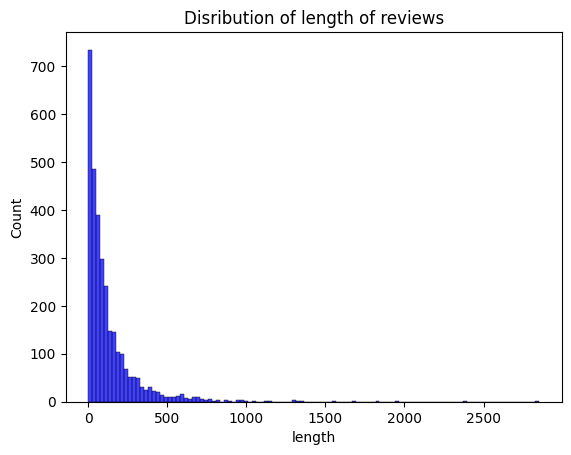

In [41]:
sns.histplot(data["length"],color = "blue").set(title="Disribution of length of reviews")

[Text(0.5, 1.0, 'Distribution of length of review if feedback= 0')]

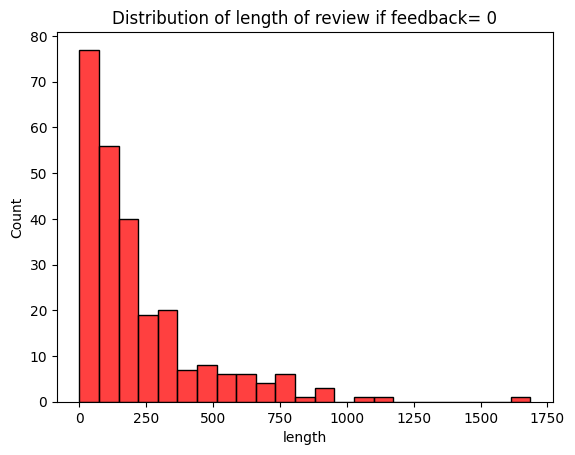

In [42]:
#Lengh analysis when feedback is negative(0)
sns.histplot(data[data["feedback"]==0]["length"],color = "red").set(title = "Distribution of length of review if feedback= 0")

[Text(0.5, 1.0, 'Distribution of length of review if feedback= 1')]

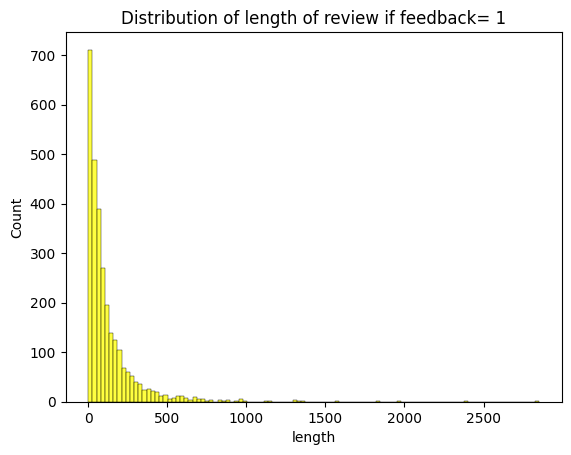

In [43]:
#Length analysis when feedbacck is 1
sns.histplot(data[data["feedback"]==1]["length"],color = "yellow").set(title = "Distribution of length of review if feedback= 1")

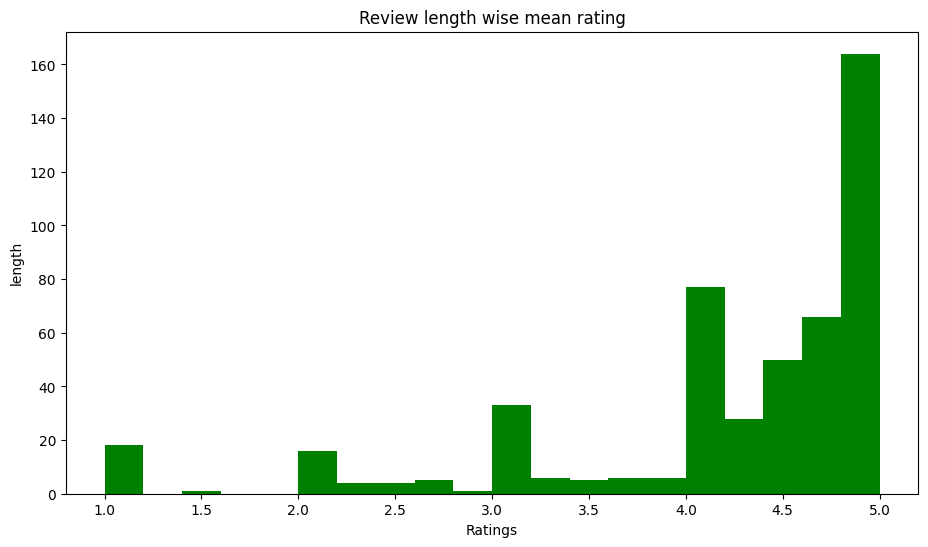

In [44]:
#Lengthwise mean rating
data.groupby("length")["rating"].mean().plot.hist(color = "green",figsize = (11,6),bins = 20)
plt.title("Review length wise mean rating")
plt.xlabel("Ratings")
plt.ylabel("length")
plt.show()

In [45]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(data.verified_reviews)

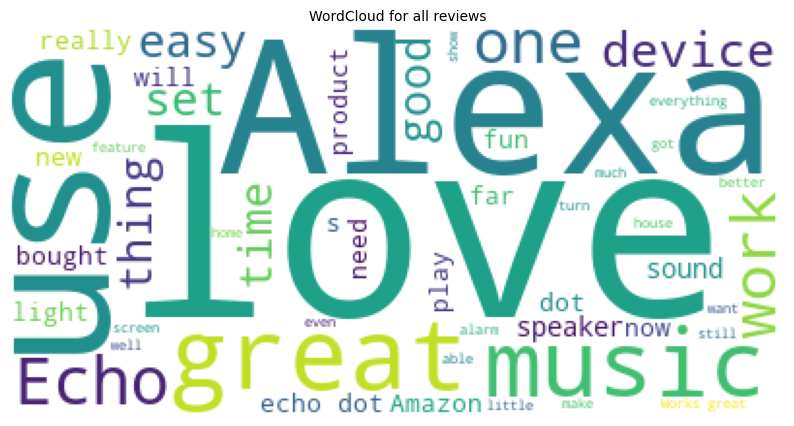

In [46]:
#Combine all reviews
reviews = " ".join([review for review in data["verified_reviews"]])
#Initialize wordcloud object
wc = WordCloud(background_color = "white",max_words=50)
#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all reviews",fontsize = 10)
plt.axis("off")
plt.show()

In [47]:
#Combine all reviews for each feedback category and splitting them into individual wods
neg_reviews = " ".join([review for review in data[data["feedback"] == 0]["verified_reviews"]])
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in data[data["feedback"] == 1]["verified_reviews"]])
pos_reviews = pos_reviews.lower().split()
#Words from reviews that are in that feedback category only
unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ".join(unique_neg)
unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos = " ".join(unique_pos)

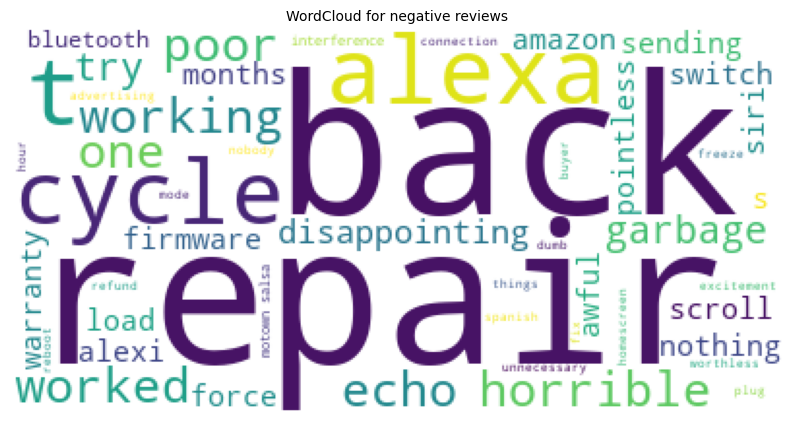

In [48]:
wc = WordCloud(background_color = "white",max_words=50)
#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.title("WordCloud for negative reviews",fontsize = 10)
plt.axis("off")
plt.show()

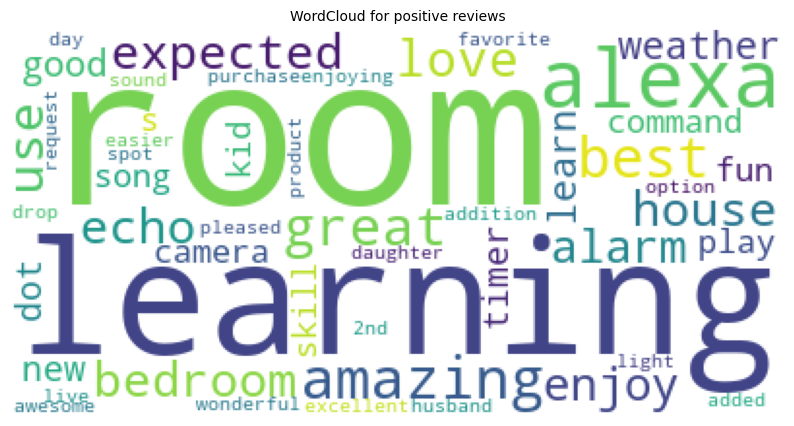

In [49]:
wc = WordCloud(background_color = "white",max_words=50)
#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_pos))
plt.title("WordCloud for positive reviews",fontsize = 10)
plt.axis("off")
plt.show()

In [50]:
#Preprocessing and Model building
corpus = []
stemmer = PorterStemmer()
for i in range(0,data.shape[0]):
    review = re.sub("[^a-zA-Z]"," ",data.iloc[i]["verified_reviews"])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)

In [51]:
#CountVectorizer to create bag of words
cv = CountVectorizer(max_features=2500)
#storing independent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data["feedback"].values

In [52]:
#Saving the CountVectorizer
pickle.dump(cv,open("Models/CountVectorizer.pkl","wb"))

In [53]:
#Checking the shape of X an y
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (3149, 2500)
y shape : (3149,)


In [54]:
#Splitting data into train and test set with 30% data with testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 15)

In [55]:
print(f"X train max value: {X_train.max()}")
print(f"y test max value: {y_test.max()}")

X train max value: 12
y test max value: 1


In [56]:
#Scaling so that all values are between 0 and 1
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [57]:
#Saving the scaler model
pickle.dump(scaler,open("Models/scaler.pkl","wb"))

In [58]:
#XGBOOST ALGORITHM
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [59]:
#Accuracy of the model on training and testing data
print("Training accuracy : ", model_xgb.score(X_train_scl,y_train))
print("Testing accuracy : ",model_xgb.score(X_test_scl,y_test))

Training accuracy :  0.9718693284936479
Testing accuracy :  0.9375661375661376


In [62]:
y_preds = model_xgb.predict(X_test)

In [63]:
#Confusion matrix
cm = confusion_matrix(y_test,y_preds)
print(cm)

[[ 35  43]
 [ 18 849]]


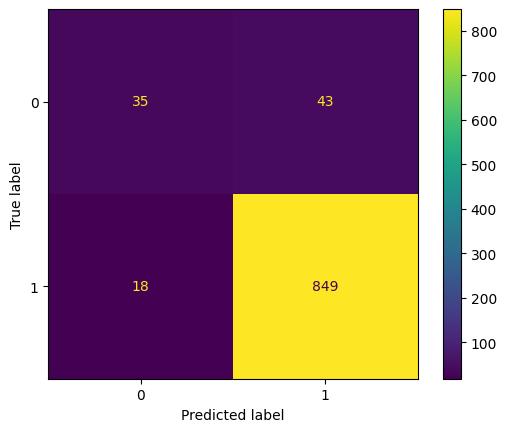

In [64]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [65]:
pickle.dump(model_xgb,open("Models/model_xgb.pkl", "wb"))